In [6]:
# Standard Data Handling
import pandas as pd

# Mathematical and Statistical Operations
import numpy as np

# For plotting graphs and charts
import matplotlib.pyplot as plt
%matplotlib inline

# SciKit library to impute missing values
from sklearn.impute import KNNImputer

import math

print("Libraries imported!")

Libraries imported!


In [7]:
data = pd.read_csv('weather-AUS.csv' , parse_dates=['Date'])
data.set_index('Date', inplace=True)
data.shape

(145460, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 01-12-2008 to 25-06-2017
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 

In [12]:
print("Number of null values in each column:\n")
data.isnull().sum()

Number of null values in each column:



Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [14]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [16]:
data.nunique()

Location          49
MinTemp          389
MaxTemp          505
Rainfall         681
Evaporation      358
Sunshine         145
WindGustDir       16
WindGustSpeed     67
WindDir9am        16
WindDir3pm        16
WindSpeed9am      43
WindSpeed3pm      44
Humidity9am      101
Humidity3pm      101
Pressure9am      546
Pressure3pm      549
Cloud9am          10
Cloud3pm          10
Temp9am          441
Temp3pm          502
RainToday          2
RainTomorrow       2
dtype: int64

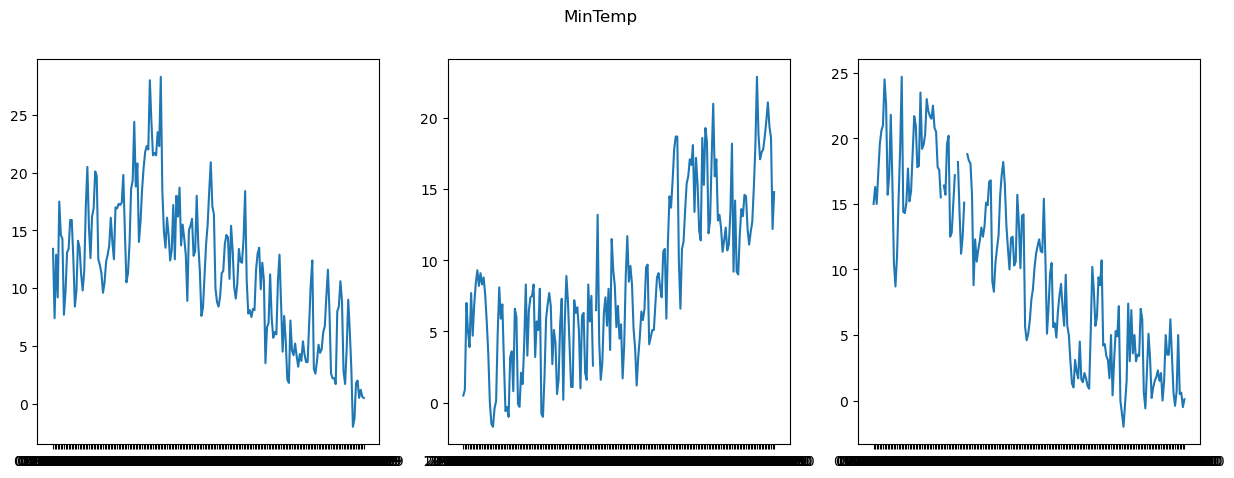

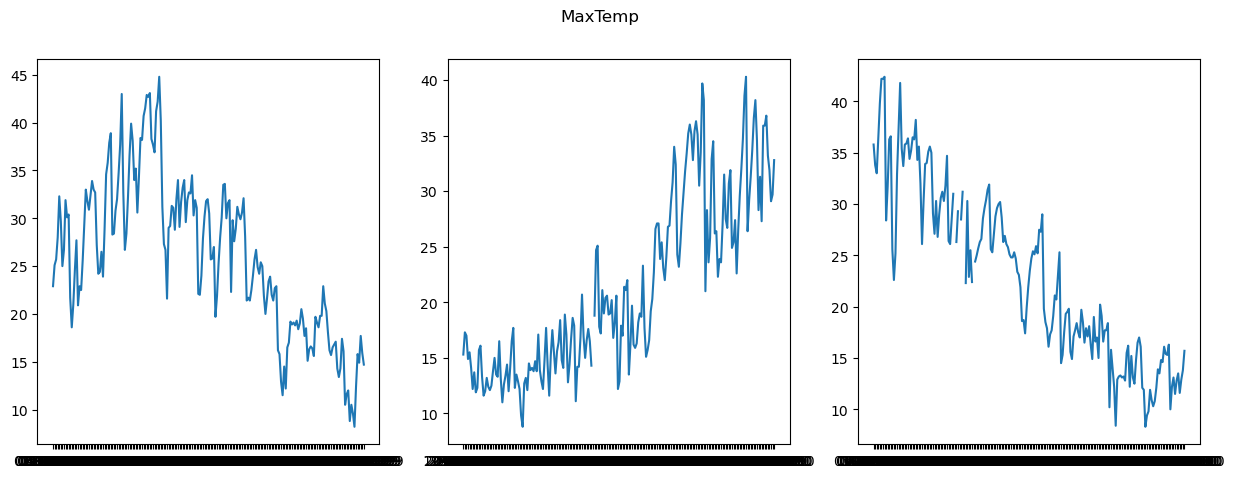

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle('MinTemp')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['MinTemp'][j:j+gaps])
    j += gaps
    
j = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('MaxTemp')
for i in range(plots):
    axes[i].plot(data['MaxTemp'][j:j+gaps])
    j += gaps

In [20]:
data['MinTemp'].interpolate(method='linear', inplace=True)
data['MaxTemp'].interpolate(method='linear', inplace=True)

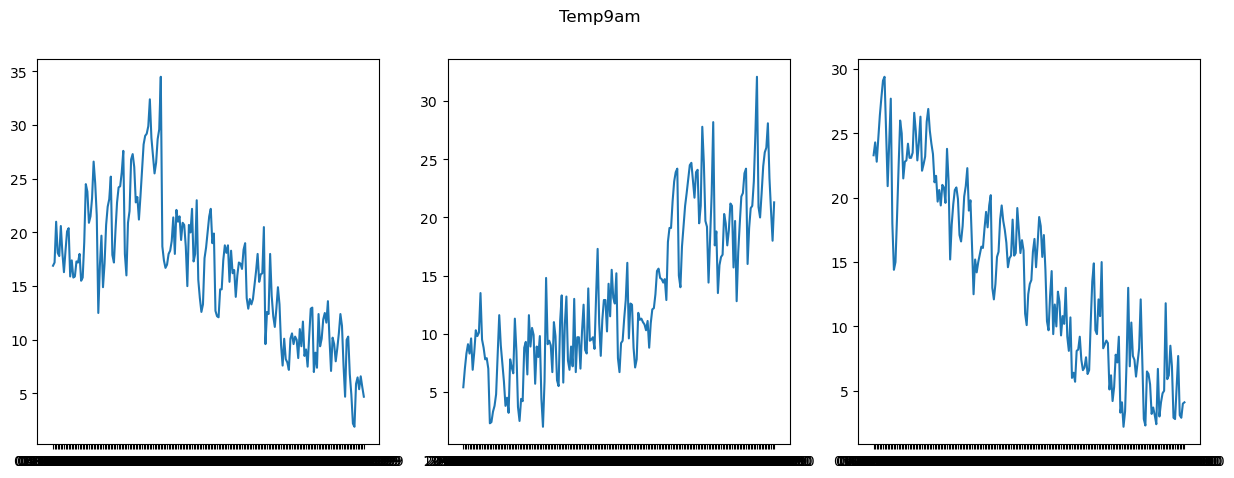

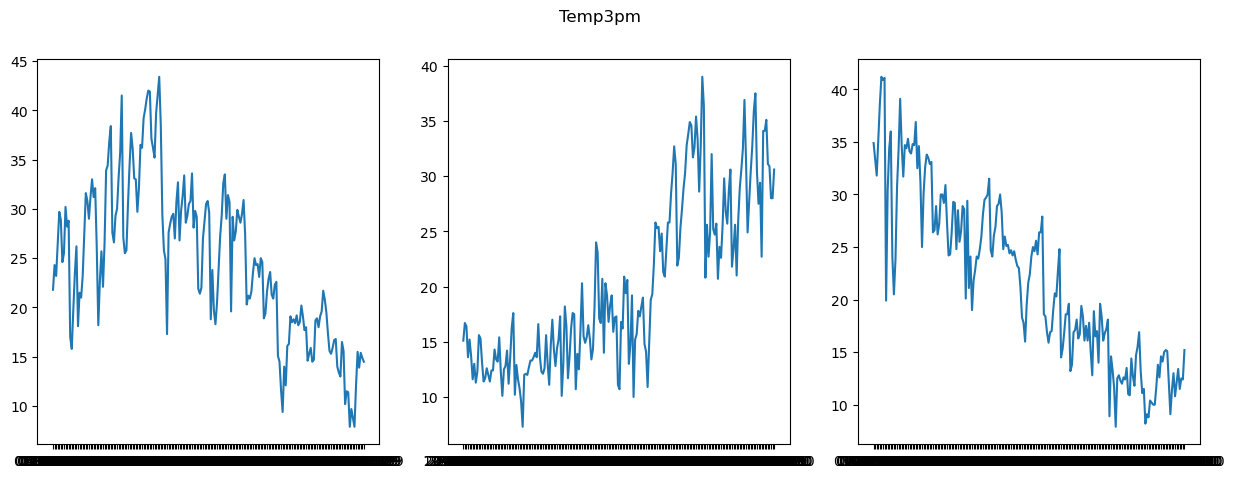

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Temp9am')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['Temp9am'][j:j+gaps])
    j += gaps
    
j = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Temp3pm')
for i in range(plots):
    axes[i].plot(data['Temp3pm'][j:j+gaps])
    j += gaps

In [23]:
data['Temp9am'].interpolate(method='linear', inplace=True)
data['Temp3pm'].interpolate(method='linear', inplace=True)

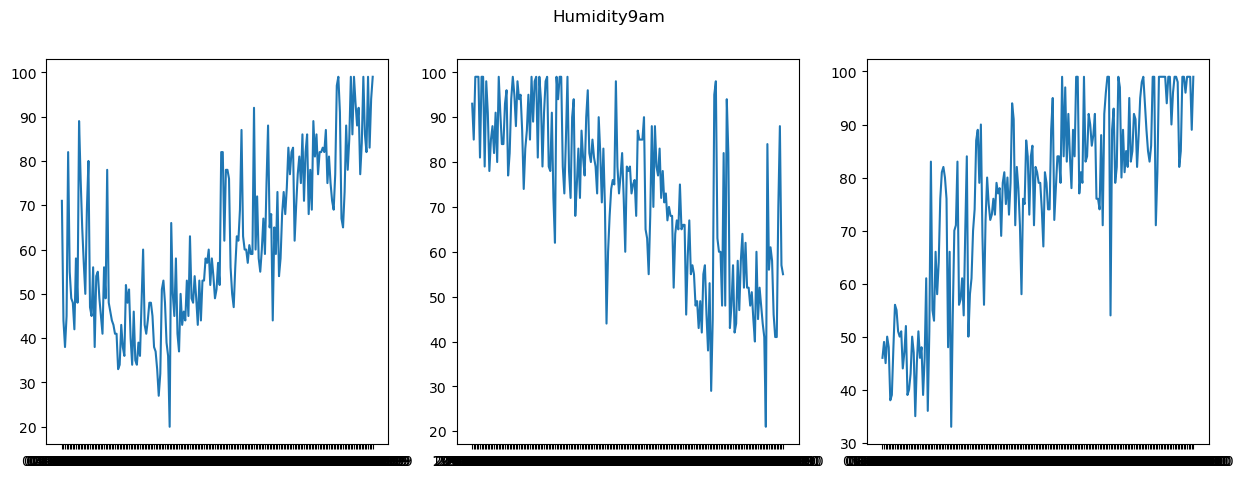

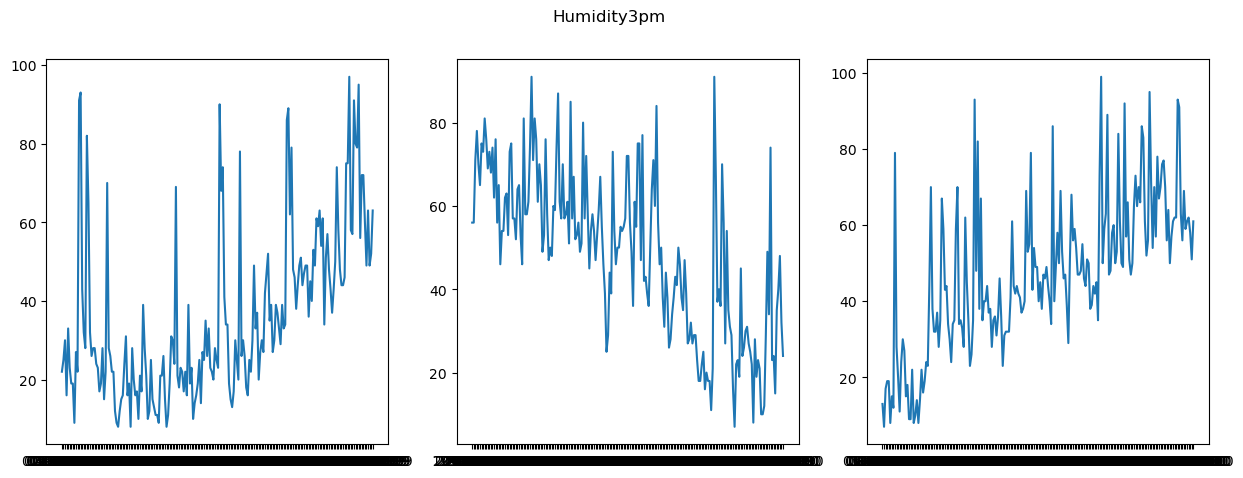

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Humidity9am')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['Humidity9am'][j:j+gaps])
    j += gaps

j = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Humidity3pm')
for i in range(plots):
    axes[i].plot(data['Humidity3pm'][j:j+gaps])
    j += gaps

In [28]:
data['Humidity9am'].interpolate(method='linear', inplace=True)
data['Humidity3pm'].interpolate(method='linear', inplace=True)

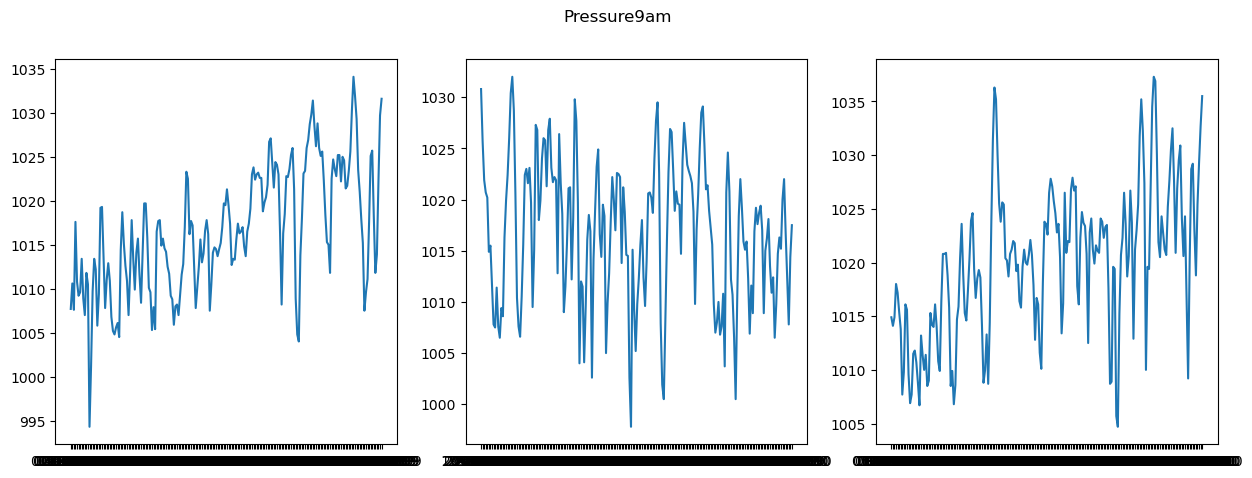

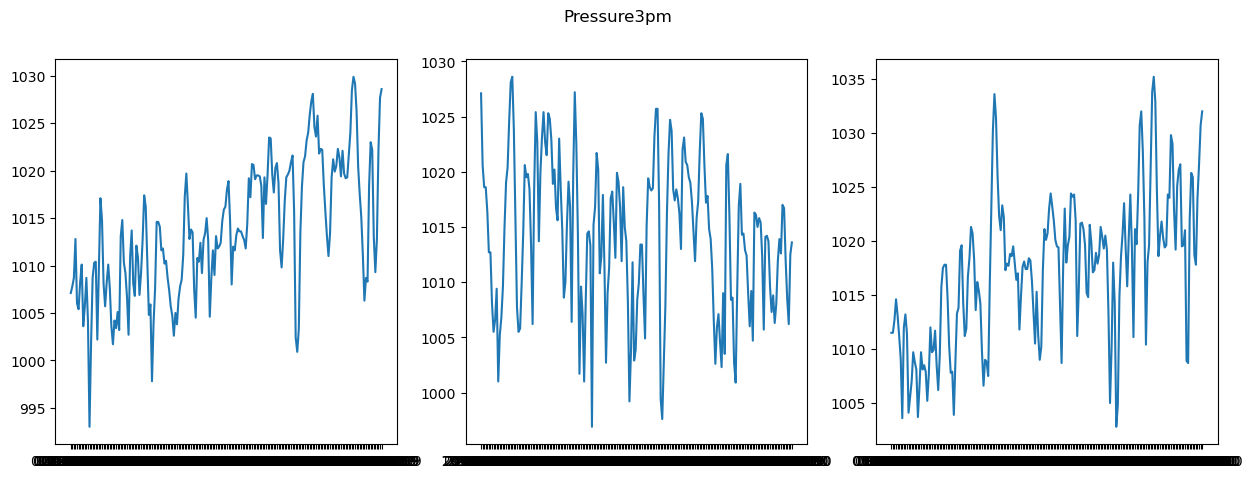

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Pressure9am')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['Pressure9am'][j:j+gaps])
    j += gaps
    
j = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Pressure3pm')
for i in range(plots):
    axes[i].plot(data['Pressure3pm'][j:j+gaps])
    j += gaps

In [31]:
data['Pressure9am'].interpolate(method='linear', inplace=True)
data['Pressure3pm'].interpolate(method='linear', inplace=True)

In [34]:
data['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [36]:
Rain_today = {'No': 0, 'Yes': 1}
data['RainToday'] = data['RainToday'].map(Rain_today)

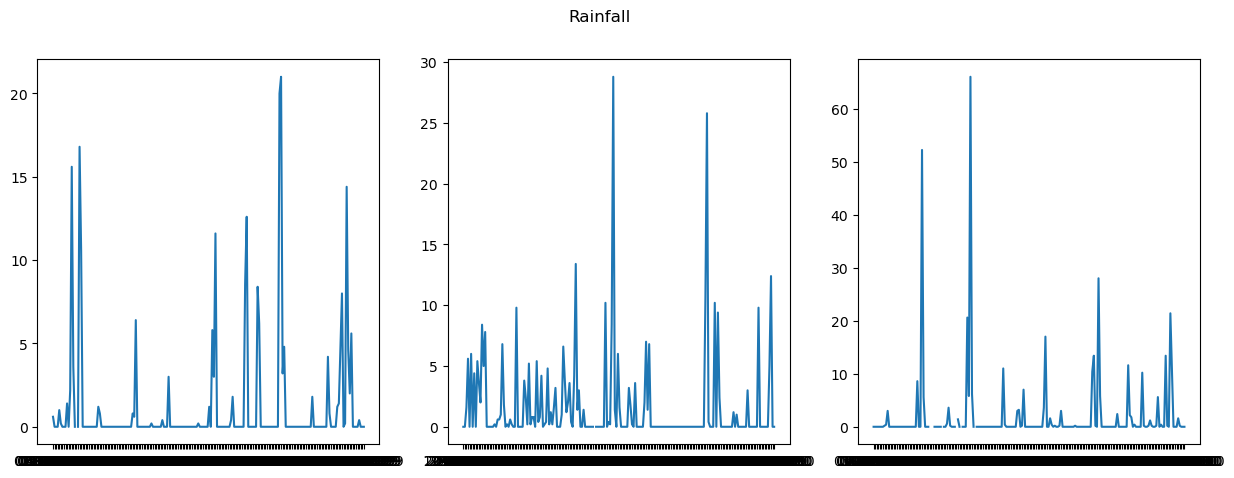

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Rainfall')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['Rainfall'][j:j+gaps])
    j += gaps

In [39]:
print(data[data['RainToday'].isnull()]['Rainfall'].isnull().sum())
print(data[data['RainToday'].isnull()]['RainTomorrow'].isnull().sum())

3261
1855


In [42]:
data = data.dropna(subset=['RainToday'])
data = data.dropna(subset=['RainTomorrow'])

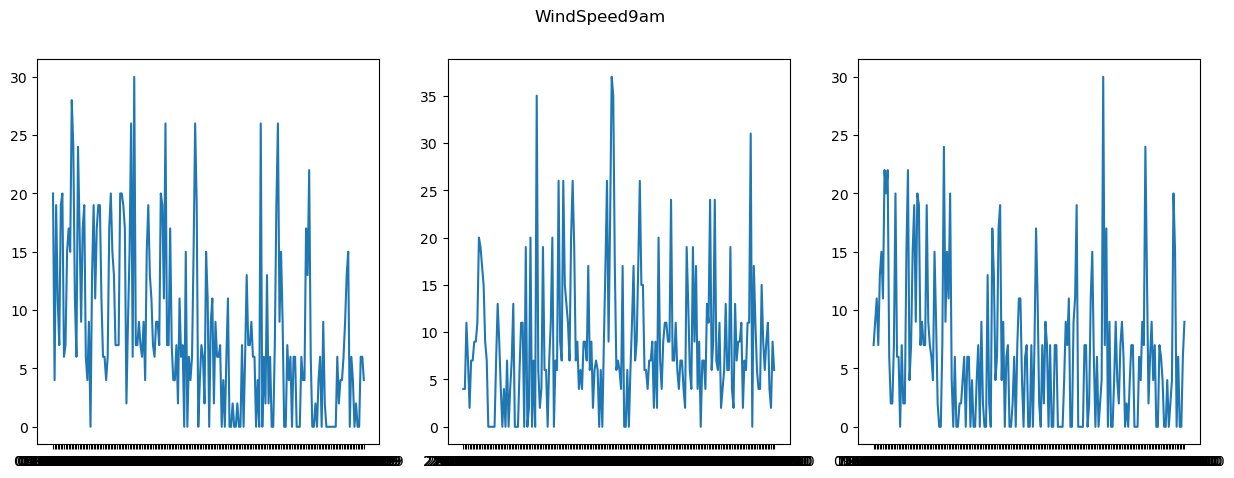

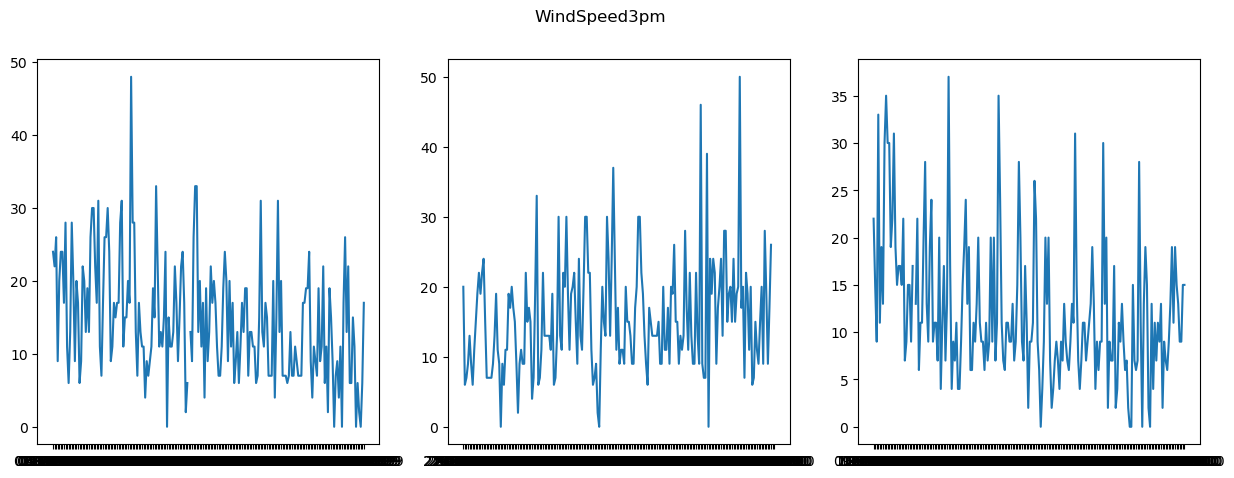

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('WindSpeed9am')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['WindSpeed9am'][j:j+gaps])
    j += gaps
    
j = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('WindSpeed3pm')
for i in range(plots):
    axes[i].plot(data['WindSpeed3pm'][j:j+gaps])
    j += gaps

In [45]:
data['WindSpeed9am'].interpolate(method='linear', inplace=True)
data['WindSpeed3pm'].interpolate(method='linear', inplace=True)

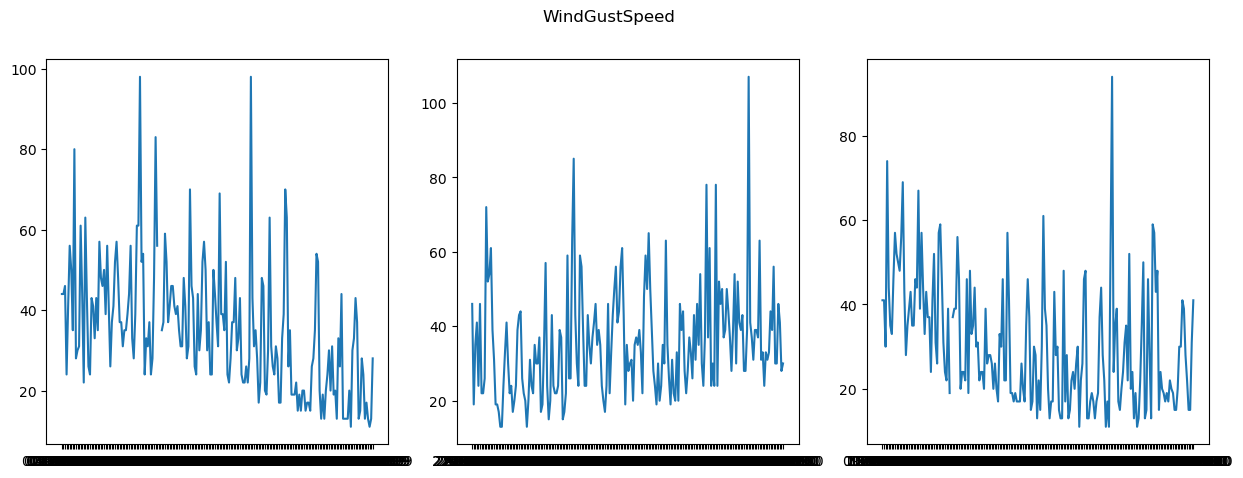

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('WindGustSpeed')
plots = 3
gaps = 200
j = 0

for i in range(plots):
    axes[i].plot(data['WindGustSpeed'][j:j+gaps])
    j += gaps

In [47]:
data['WindGustSpeed'].interpolate(method='linear', inplace=True)

In [50]:
directions_code = {
    'N': 0,
    'NNE': 1,
    'NE': 2,
    'ENE': 3,
    'E': 4,
    'ESE': 5,
    'SE': 6,
    'SSE': 7,
    'S': 8,
    'SSW': 9,
    'SW': 10,
    'WSW': 11,
    'W': 12,
    'WNW': 13,
    'NW': 14,
    'NNW': 15
}

data['WindGustDir'] = data['WindGustDir'].map(directions_code).astype('float64')
data['WindDir9am'] = data['WindDir9am'].map(directions_code).astype('float64')
data['WindDir3pm'] = data['WindDir3pm'].map(directions_code).astype('float64')

In [54]:
data['WindGustDir'].interpolate(method='linear', inplace=True)
data['WindDir9am'].interpolate(method='linear', inplace=True)
data['WindDir3pm'].interpolate(method='linear', inplace=True)

In [56]:
data['WindGustDir'] = np.ceil(data['WindGustDir'])
data['WindDir9am'] = np.ceil(data['WindDir9am'])
data['WindDir3pm'] = np.ceil(data['WindDir3pm'])

data['WindGustDir'] = data['WindGustDir'].round().astype('Int64')
data['WindDir9am'] = data['WindDir9am'].round().astype('Int64')
data['WindDir3pm'] = data['WindDir3pm'].round().astype('Int64')

In [58]:
refined_data = data.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)  # Dropping columns as 1/3 data is missing

In [60]:
refined_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [62]:
unique_locations = data['Location'].unique()
location_dict = {location: idx + 1 for idx, location in enumerate(unique_locations)}

refined_data['Location'] = refined_data['Location'].map(location_dict).astype('float64')

In [64]:
def normalize_data(cols, data):
    for column in cols:
        if data[column].dtype == float :
            mean = data[column].mean()
            std = data[column].std()
            data[column] = (data[column] - mean) / std
    return data

In [66]:
refined_data['RainTomorrow'] = refined_data['RainTomorrow'].map(Rain_today).astype(float)
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm']
normalize_data(cols , refined_data)
refined_data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
01-12-2008,1.0,0.189364,-0.047310,-0.206726,12,0.302797,12,13,0.676755,0.591087,0.112094,-1.420037,-1.375851,-1.128698,-0.010245,0.009867,0.0,0.0
02-12-2008,1.0,-0.747962,0.261939,-0.277605,13,0.302797,15,11,-1.126377,0.365508,-1.299043,-1.275265,-0.963054,-1.028336,0.035843,0.370342,0.0,0.0
03-12-2008,1.0,0.111253,0.346279,-0.277605,11,0.452654,12,11,0.564060,0.816665,-1.612629,-1.033978,-1.390085,-0.899300,0.619623,0.211733,0.0,0.0
04-12-2008,1.0,-0.466764,0.669585,-0.277605,2,-1.195774,6,4,-0.337507,-1.100753,-1.246779,-1.709581,0.033354,-0.311466,0.174107,0.687560,0.0,0.0
05-12-2008,1.0,0.829870,1.274025,-0.159474,12,0.078011,3,14,-0.788290,0.139930,0.687002,-0.889206,-0.934585,-1.286410,0.128019,1.148968,0.0,0.0


In [68]:
from sklearn.model_selection import train_test_split

y = refined_data['RainTomorrow']
X = refined_data.drop(['RainTomorrow'], axis=1)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)

accuracy_manual = correct_predictions / total_predictions
print(f"Manual accuracy on test data: {accuracy_manual}")

Manual accuracy on test data: 0.8181689040414802


In [72]:
class LogisticRegression:
    def __init__(self, lr=0.001, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        self.losses = []
         
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self.sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iter):
            A = self.feed_forward(X)
            dz = A - y
            self.losses.append(self.compute_loss(y,A))
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(y_hat)
        final_pred = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(final_pred)

model = LogisticRegression(lr=0.001, num_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

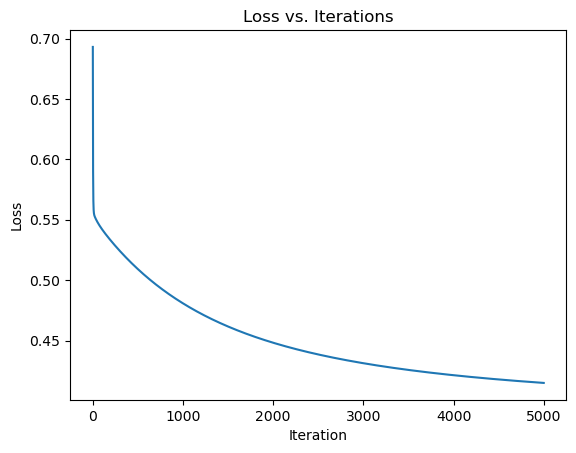

In [74]:
plt.plot(range(model.num_iter), model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

red_xtrain = pca.fit_transform(X_train)
red_xtest = pca.fit_transform(X_test)

In [78]:
pca_model = LogisticRegression(lr = 0.002, num_iter = 5000)
pca_model.fit(red_xtrain, y_train)
pca_ypred = pca_model.predict(red_xtest)

In [80]:
correct_predictions = np.sum(pca_ypred == y_test)
total_predictions = len(y_test)

accuracy_manual = correct_predictions / total_predictions
print(f"Manual accuracy after pca on test data: {accuracy_manual}")

Manual accuracy after pca on test data: 0.7776475601960366


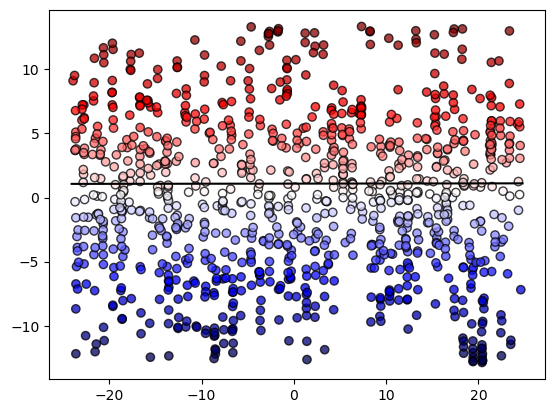

In [82]:
plt.scatter(red_xtest[:1000,0], red_xtest[:1000,1], c=red_xtest[:1000,1], cmap='seismic', edgecolors='k', alpha=0.75)
x_values = np.linspace(min(red_xtest[:,0]), max(red_xtest[:,0]), 100)
y_values = -(pca_model.weights[0] * x_values + pca_model.bias) 
plt.plot(x_values, y_values, color='k')